#  <font color='lightblue'> Day05: Stats of sequences

### <font color='pink'> Here I focused on two amino acid sequences of proteins that known to be muteted in breast cancer BRCA1 and BRCA2 expecially in Ashkenazi Jews

In [157]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [158]:
# Read the BRCA1 prtein sequence file
brca1_seq = pd.read_csv("BRCA1_protein_sequence.txt",header= 0)
print(brca1_seq.head())
type(brca1_seq)

  >sp|P38398|BRCA1_HUMAN Breast cancer type 1 susceptibility protein OS=Homo sapiens OX=9606 GN=BRCA1 PE=1 SV=2
0  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...                                                           
1  CPLCKNDITKRSLQESTRFSQLVEELLKIICAFQLDTGLEYANSYN...                                                           
2  EVSIIQSMGYRNRAKRLLQSEPENPSLQETSLSVQLSNLGTVRTLR...                                                           
3  ELGSDSSEDTVNKATYCSVGDQELLQITPQGTRDEISLDSAKKAAC...                                                           
4  PSNNDLNTTEKRAAERHPEKYQGSSVSNLHVEPCGTNTHASSLQHE...                                                           


pandas.core.frame.DataFrame

In [159]:
# Check DataFrame dimentions
rows, columns = brca1_seq.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 32, Number of columns: 1


In [160]:
# Convert to a single concatenated string
concatenated_vector_brca1 = "".join(brca1_seq.iloc[:,0].astype(str))
print(concatenated_vector_brca1)

MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKFCMLKLLNQKKGPSQCPLCKNDITKRSLQESTRFSQLVEELLKIICAFQLDTGLEYANSYNFAKKENNSPEHLKDEVSIIQSMGYRNRAKRLLQSEPENPSLQETSLSVQLSNLGTVRTLRTKQRIQPQKTSVYIELGSDSSEDTVNKATYCSVGDQELLQITPQGTRDEISLDSAKKAACEFSETDVTNTEHHQPSNNDLNTTEKRAAERHPEKYQGSSVSNLHVEPCGTNTHASSLQHENSSLLLTKDRMNVEKAEFCNKSKQPGLARSQHNRWAGSKETCNDRRTPSTEKKVDLNADPLCERKEWNKQKLPCSENPRDTEDVPWITLNSSIQKVNEWFSRSDELLGSDDSHDGESESNAKVADVLDVLNEVDEYSGSSEKIDLLASDPHEALICKSERVHSKSVESNIEDKIFGKTYRKKASLPNLSHVTENLIIGAFVTEPQIIQERPLTNKLKRKRRPTSGLHPEDFIKKADLAVQKTPEMINQGTNQTEQNGQVMNITNSGHENKTKGDSIQNEKNPNPIESLEKESAFKTKAEPISSSISNMELELNIHNSKAPKKNRLRRKSSTRHIHALELVVSRNLSPPNCTELQIDSCSSSEEIKKKKYNQMPVRHSRNLQLMEGKEPATGAKKSNKPNEQTSKRHDSDTFPELKLTNAPGSFTKCSNTSELKEFVNPSLPREEKEEKLETVKVSNNAEDPKDLMLSGERVLQTERSVESSSISLVPGTDYGTQESISLLEVSTLGKAKTEPNKCVSQCAAFENPKGLIHGCSKDNRNDTEGFKYPLGHEVNHSRETSIEMEESELDAQYLQNTFKVSKRQSFAPFSNPGNAEEECATFSAHSGSLKKQSPKVTFECEQKEENQGKNESNIKPVQTVNITAGFPVVGQKDKPVDNAKCSIKGGSRFCLSSQFRGNETGLITPNKHGLLQNPYRIPPLFPIKSFVKTKCKKNLLE

In [161]:
# Get unique characters (amino acids) from the string
amino_acids= sorted(set(concatenated_vector_brca1)) 
num_amino_acids_brca1  = len(amino_acids)
print(amino_acids,"\n the number of unique amino acids is:", num_amino_acids_brca1)


['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'] 
 the number of unique amino acids is: 20


In [162]:
# Count amino acid occurance

def count_amino_acids(sequence):
    """
    Count occurrences of each amino acid in a given sequence.

    Parameters:
        sequence (str): A string representing a protein sequence.

    Returns:
        dict: A dictionary with amino acids as keys and their counts as values.
    """
    amino_acid_counts = {}
    for char in sequence:
        if char in amino_acid_counts:
            amino_acid_counts[char] += 1
        else:
            amino_acid_counts[char] = 1
    return amino_acid_counts


In [163]:
# Apply the function
amino_acid_counts_brca1 = count_amino_acids(concatenated_vector_brca1)
amino_acid_counts_brca1

{'M': 30,
 'D': 85,
 'L': 156,
 'S': 224,
 'A': 84,
 'R': 76,
 'V': 101,
 'E': 198,
 'Q': 97,
 'N': 121,
 'I': 77,
 'K': 137,
 'C': 44,
 'P': 96,
 'T': 111,
 'H': 49,
 'F': 49,
 'G': 87,
 'Y': 31,
 'W': 10}

C:\Users\Shirik\AppData\Local\Temp\ipykernel_3196\2835836773.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=amino_acids, y=counts, palette="viridis")


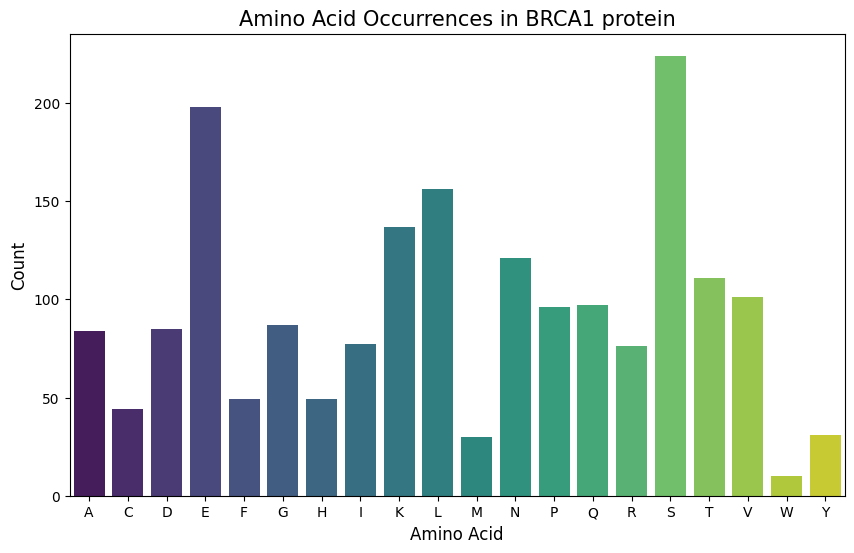

In [164]:
# Convert counts to sorted lists for plotting
amino_acids_brca1 = sorted(amino_acid_counts_brca1.keys())
counts = [amino_acid_counts_brca1[aa] for aa in amino_acids_brca1]

# Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=amino_acids, y=counts, palette="viridis")

# Add labels and title
plt.xlabel("Amino Acid", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Amino Acid Occurrences in BRCA1 protein", fontsize=15)
plt.show()

In [165]:
# Read also BRCA2 sequence which is in the same protein family
brca2_seq = pd.read_csv("BRCA2_protein_sequence.txt",header= 0)
print(brca2_seq.head())

  >sp|P51587|BRCA2_HUMAN Breast cancer type 2 susceptibility protein OS=Homo sapiens OX=9606 GN=BRCA2 PE=1 SV=4
0  MPIGSKERPTFFEIFKTRCNKADLGPISLNWFEELSSEAPPYNSEP...                                                           
1  LFKTPQRKPSYNQLASTPIIFKEQGLTLPLYQSPVKELDKFKLDLG...                                                           
2  KTKMDQADDVSCPLLNSCLSESPVVLQCTHVTPQRDKSVVCGSLFH...                                                           
3  SESLGAEVDPDMSWSSSLATPPTLSSTVLIVRNEEASETVFPHDTT...                                                           
4  KKNDRFIASVTDSENTNQREAASHGFGKTSGNSFKVNSCKDHIGKS...                                                           


In [166]:
# Check BRCA2 DataFrame dimentions
rows, columns = brca2_seq.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 57, Number of columns: 1


In [167]:
# Convert to a single concatenated string
concatenated_vector_brca2 = "".join(brca2_seq.iloc[:,0].astype(str))
print(concatenated_vector_brca2)

MPIGSKERPTFFEIFKTRCNKADLGPISLNWFEELSSEAPPYNSEPAEESEHKNNNYEPNLFKTPQRKPSYNQLASTPIIFKEQGLTLPLYQSPVKELDKFKLDLGRNVPNSRHKSLRTVKTKMDQADDVSCPLLNSCLSESPVVLQCTHVTPQRDKSVVCGSLFHTPKFVKGRQTPKHISESLGAEVDPDMSWSSSLATPPTLSSTVLIVRNEEASETVFPHDTTANVKSYFSNHDESLKKNDRFIASVTDSENTNQREAASHGFGKTSGNSFKVNSCKDHIGKSMPNVLEDEVYETVVDTSEEDSFSLCFSKCRTKNLQKVRTSKTRKKIFHEANADECEKSKNQVKEKYSFVSEVEPNDTDPLDSNVANQKPFESGSDKISKEVVPSLACEWSQLTLSGLNGAQMEKIPLLHISSCDQNISEKDLLDTENKRKKDFLTSENSLPRISSLPKSEKPLNEETVVNKRDEEQHLESHTDCILAVKQAISGTSPVASSFQGIKKSIFRIRESPKETFNASFSGHMTDPNFKKETEASESGLEIHTVCSQKEDSLCPNLIDNGSWPATTTQNSVALKNAGLISTLKKKTNKFIYAIHDETSYKGKKIPKDQKSELINCSAQFEANAFEAPLTFANADSGLLHSSVKRSCSQNDSEEPTLSLTSSFGTILRKCSRNETCSNNTVISQDLDYKEAKCNKEKLQLFITPEADSLSCLQEGQCENDPKSKKVSDIKEEVLAAACHPVQHSKVEYSDTDFQSQKSLLYDHENASTLILTPTSKDVLSNLVMISRGKESYKMSDKLKGNNYESDVELTKNIPMEKNQDVCALNENYKNVELLPPEKYMRVASPSRKVQFNQNTNLRVIQKNQEETTSISKITVNPDSEELFSDNENNFVFQVANERNNLALGNTKELHETDLTCVNEPIFKNSTMVLYGDTGDKQATQVSIKKDLVYVLAEENKNSVKQHIKMTLGQDLKSDISLNIDKIPEKNNDYMNKWAGLLGPI

In [168]:
amino_acid_counts_brca2 = count_amino_acids(concatenated_vector_brca2)
amino_acid_counts_brca2

{'M': 45,
 'P': 149,
 'I': 187,
 'G': 122,
 'S': 381,
 'K': 322,
 'E': 293,
 'R': 110,
 'T': 220,
 'F': 136,
 'C': 76,
 'N': 230,
 'A': 174,
 'D': 171,
 'L': 281,
 'W': 20,
 'Y': 79,
 'H': 83,
 'Q': 154,
 'V': 185}

C:\Users\Shirik\AppData\Local\Temp\ipykernel_3196\549743958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=amino_acids, y=counts, palette="viridis")


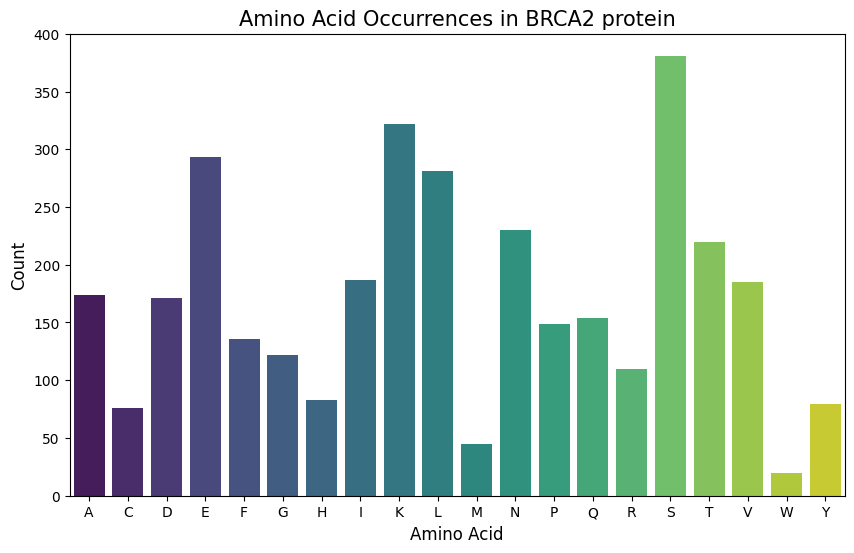

In [169]:
# Convert counts to sorted lists for plotting
amino_acids_brca2 = sorted(amino_acid_counts_brca2.keys())
counts = [amino_acid_counts_brca2[aa] for aa in amino_acids_brca2]

# Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=amino_acids, y=counts, palette="viridis")

# Add labels and title
plt.xlabel("Amino Acid", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Amino Acid Occurrences in BRCA2 protein", fontsize=15)
plt.show()

### Mode

In [170]:
# Calculate mode
def find_mode(amino_acid_counts):
    """
    Find the amino acid(s) with the highest frequency in a dictionary.
    
    Parameters:
        amino_acid_counts (dict): Dictionary with amino acids as keys and counts as values.
        
    Returns:
        list: A list of amino acid(s) with the highest frequency.
    """
    max_count = max(amino_acid_counts.values())  # Find the maximum count
    mode = [aa for aa, count in amino_acid_counts.items() if count == max_count]  # Find amino acid(s) with max count
    return mode


In [171]:
# Get the mode (most frequent amino acid(s))
mode_amino_acids_brca1 = find_mode(amino_acid_counts_brca1)
mode_amino_acids_brca2 = find_mode(amino_acid_counts_brca2)

# Display the result
print("Most frequent amino acid in BRCA1:", mode_amino_acids_brca1)
print("Most frequent amino acid in BRCA2:", mode_amino_acids_brca2)

Most frequent amino acid in BRCA1: ['S']
Most frequent amino acid in BRCA2: ['S']


### Pie Chart

In [172]:

def count_amino_acid_percentages(sequence):
    """
    Count occurrences of each amino acid and convert to percentages.
    
    Parameters:
        sequence (str): A string representing a protein sequence.
        
    Returns:
        dict: A dictionary with amino acids as keys and their percentages as values.
    """
    # Count occurrences
    amino_acid_counts = {}
    for char in sequence:
        if char in amino_acid_counts:
            amino_acid_counts[char] += 1
        else:
            amino_acid_counts[char] = 1

    # Calculate total count and percentages
    total = sum(amino_acid_counts.values())
    amino_acid_percentages = {aa: (count / total) * 100 for aa, count in amino_acid_counts.items()}
    return amino_acid_percentages

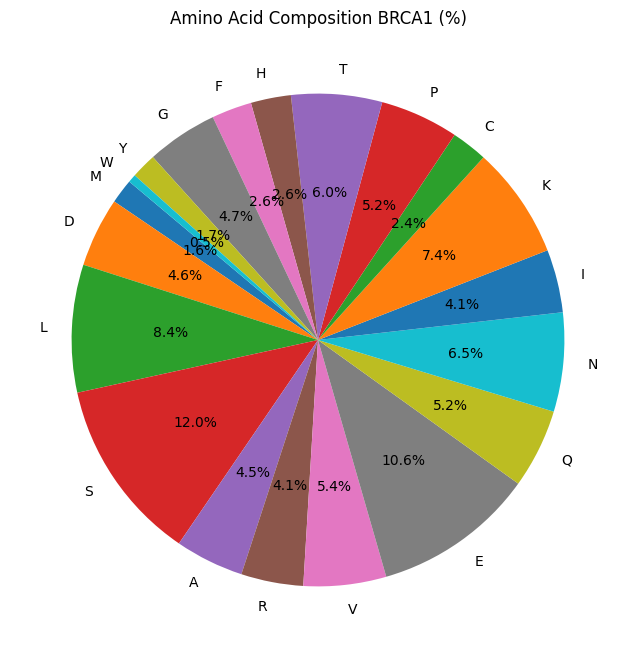

In [173]:
# Get amino acid percentages BRCA 1
amino_acid_percentages = count_amino_acid_percentages(concatenated_vector_brca1)

# Prepare data for the pie chart
labels = amino_acid_percentages.keys()
sizes = amino_acid_percentages.values()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Amino Acid Composition BRCA1 (%)")
plt.show()

### My first try of bio-informatic sequence comparison (BRCA1 vs. BRCA2):

In [174]:

# Global sequence alignment
alignments = pairwise2.align.globalxx(concatenated_vector_brca1, concatenated_vector_brca2)

# Display the best alignment
print("Best Alignment:")
print(format_alignment(*alignments[0]))

# Compute and display the similarity percentage
best_alignment = alignments[0]
similarity_percentage = (best_alignment[2] / max(len(concatenated_vector_brca1), len(concatenated_vector_brca2))) * 100
print(f"Sequence Similarity: {similarity_percentage:.2f}%")

Best Alignment:
MDL---SALRV-E-----EVQNVI-----NAMQKI--LEC-PIC-L---E-LIK--E-PV---S-------------------T---KCDH----------I-FCKFCM---LK-L-LN-Q---K---K-----G---P-S-------------Q-----CPLCK-NDITKRS-LQ-ES------T-----RF--SQ-----L------V----------E----E----------L-----LKI-----IC-----A----FQL--DTGLEY-AN--SYNFA-------KK-----------EN-NSP--E---HL---KDE-------V-SI----IQSMGYRNRAKRLLQSE-PENPS-LQE-----T----SL---SVQL-SNLGTV-----RT--L---RT-KQ-R--IQPQ----------KTS---VYI-ELGSD--S--SE----DT------V-N-KATYC---SVG-DQ----EL----L-----QI-TPQ--GTRD------E-IS-LD---SAKKAA-CEF----SET-DV---T-N-------T-EHHQ---P--SNND-L-------NTTE-----KRAA-ER--HP-E---------KYQG--S--S-V-SNLHV-------------E-PC---------G--T--N----TH-AS-S-LQ--H------E-----N-----S--------S--L----L---L---T-K------DRMNVE---KA----------EFC--NK-SK-Q--------PGL--ARSQHNRWA--G---S--KET--C--ND----------------R---R--TP-S--TEKKV---DLNADPLCER-KEW---NKQ-KL-----PCSENPR-DT------E-----DVPWITLN-S---S-I------------Q--KVNEW-----F-SR--S---D-E----L-LG---SD-D--SHD-------G-ESE---SN